LSTM

In [8]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [10]:

# Baixar dados históricos da ação MGLU3 dos últimos 5 anos
mglu3 = yf.download('MGLU3.SA', period="5y")


[*********************100%***********************]  1 of 1 completed


In [11]:
# Exibir os primeiros 5 registros
print(mglu3.head(5))

Price        Adj Close       Close        High         Low        Open  \
Ticker        MGLU3.SA    MGLU3.SA    MGLU3.SA    MGLU3.SA    MGLU3.SA   
Date                                                                     
2020-01-15  125.110641  125.473625  127.110443  124.398003  125.520393   
2020-01-16  124.644341  125.005966  127.952232  122.293526  126.736313   
2020-01-17  126.719406  127.087059  127.274124  124.164169  125.800987   
2020-01-20  130.566467  130.945267  130.945267  126.385567  126.549248   
2020-01-21  130.356613  130.734818  132.675613  130.033325  130.290543   

Price        Volume  
Ticker     MGLU3.SA  
Date                 
2020-01-15  3952173  
2020-01-16  3583274  
2020-01-17  2585629  
2020-01-20  3167204  
2020-01-21  3448775  


In [12]:
mglu3_close = mglu3['Close'].dropna().to_numpy().reshape(-1, 1)
mglu3_close

array([[125.47362518],
       [125.00596619],
       [127.08705902],
       ...,
       [  5.80999994],
       [  5.90999985],
       [  6.36999989]])

In [13]:
# Criar um DataFrame com os valores ajustados
data = pd.DataFrame(mglu3_close)
data.columns = ['Close']

In [14]:
# Normalizar os dados para os modelos
scaler = MinMaxScaler(feature_range=(0, 1))
data['Scaled_Close'] = scaler.fit_transform(data[['Close']])

In [15]:
# Função para criar janelas de dados
def create_dataset(data, window_size=60):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [16]:
# Criar conjunto de dados
window_size = 60
scaled_data = data['Scaled_Close'].values
X, y = create_dataset(scaled_data, window_size)

In [17]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
# Ajustar o formato para o LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Criar o modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compilar o modelo
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Treinar o modelo
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - loss: 0.0921
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0052
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0045
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0033
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0037
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0039
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0024
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0031
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0028
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0027
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0030
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0031
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0029
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0028
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.00

In [22]:

# Fazer previsões
lstm_predictions = lstm_model.predict(X_test_lstm)

# Inverter a normalização
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step


Random Forest

In [23]:

# Criar o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:

# Fazer previsões
rf_predictions = rf_model.predict(X_test)

# Inverter a normalização
rf_predictions = scaler.inverse_transform(rf_predictions.reshape(-1, 1))


In [25]:

# Valores reais
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [26]:

# Calcular o erro médio quadrático (MSE)
lstm_mse = mean_squared_error(y_test_original, lstm_predictions)
rf_mse = mean_squared_error(y_test_original, rf_predictions)

print(f"LSTM MSE: {lstm_mse}")
print(f"Random Forest MSE: {rf_mse}")


LSTM MSE: 0.9337111233803376
Random Forest MSE: 16.338811039616097


Comparativo Entre os dois modelos

In [27]:

# Obter as previsões para os próximos 5 dias
last_window = scaled_data[-window_size:]
last_window = last_window.reshape(1, window_size, 1)


In [28]:

# Previsão do LSTM
lstm_forecasts = []
for _ in range(5):
    next_prediction = lstm_model.predict(last_window)
    lstm_forecasts.append(scaler.inverse_transform(next_prediction.reshape(-1, 1))[0][0])
    
    # Atualizar a janela de entrada para a próxima previsão
    last_window = np.append(last_window[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)

    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [29]:

# Previsão do Random Forest
last_window_rf = scaled_data[-window_size:]
rf_forecasts = []
for _ in range(5):
    next_rf_prediction = rf_model.predict(last_window_rf.reshape(1, -1))
    rf_forecasts.append(scaler.inverse_transform(next_rf_prediction.reshape(-1, 1))[0][0])
    
    # Atualizar a janela de entrada para a próxima previsão
    last_window_rf = np.append(last_window_rf[1:], next_rf_prediction, axis=0)


In [30]:

# Arredondar as previsões
lstm_forecasts = [round(pred, 2) for pred in lstm_forecasts]
rf_forecasts = [round(pred, 2) for pred in rf_forecasts]


In [31]:

# Criar a tabela com pandas
days = [f"Dia {i + 1}" for i in range(5)]
forecast_data = {
    "Dia": days,
    "Previsão LSTM": lstm_forecasts,
    "Previsão Random Forest": rf_forecasts,
}

forecast_table = pd.DataFrame(forecast_data)


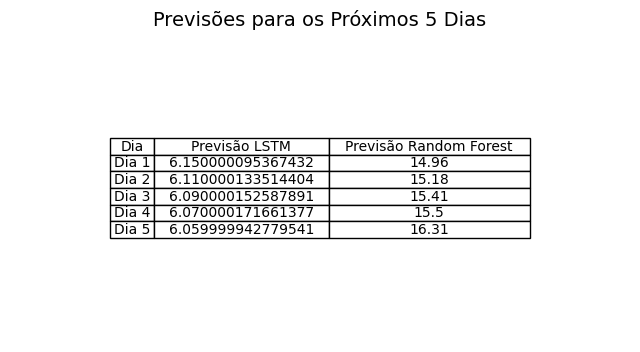

In [32]:

# Criar o plot da tabela
plt.figure(figsize=(8, 4))
plt.axis('tight')
plt.axis('off')

# Adicionar a tabela ao plot
table_plot = plt.table(
    cellText=forecast_table.values,
    colLabels=forecast_table.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

# Estilizar a tabela
table_plot.auto_set_font_size(False)
table_plot.set_fontsize(10)
table_plot.auto_set_column_width(col=list(range(len(forecast_table.columns))))

# Exibir o plot
plt.title("Previsões para os Próximos 5 Dias", fontsize=14)
plt.show()


Comparação entre Random Forest e LSTM

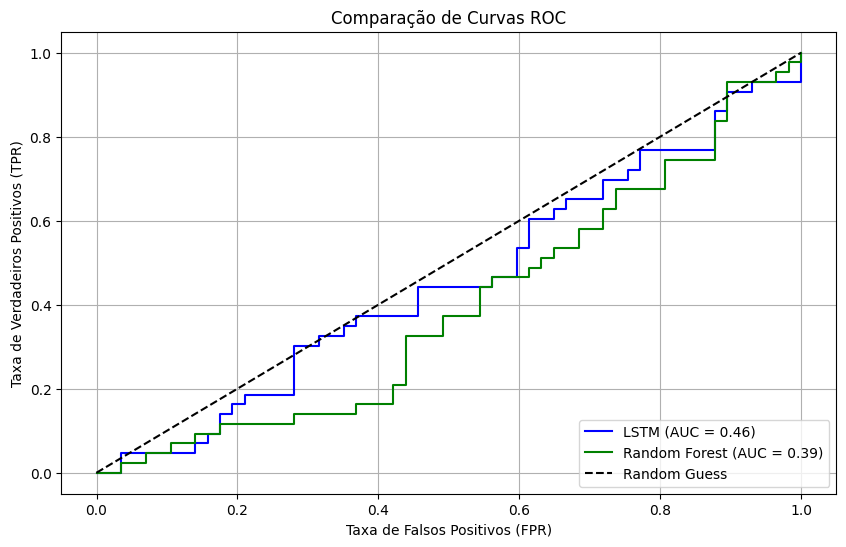

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulação de previsões (substitua pelos valores reais dos modelos)
y_test = np.random.choice([0, 1], size=100)  # Valores reais binários (0 ou 1)
y_pred_lstm = np.random.rand(100)            # Probabilidades previstas pelo LSTM
y_pred_rf = np.random.rand(100)              # Probabilidades previstas pelo Random Forest

# Calculando as métricas da curva ROC para ambos os modelos
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Calculando a área sob a curva (AUC)
auc_lstm = auc(fpr_lstm, tpr_lstm)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotando as curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Linha de referência (adivinhação aleatória)

plt.title('Comparação de Curvas ROC')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
